In [1]:
# Import necessary libraries for data manipulation, analysis, and visualization.
# Suppress warnings for cleaner output.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Mount Google Drive to access files stored in Drive. This is necessary to load the dataset from your Google Drive.
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
# List the file in the specified Google Drive path to verify its existence. This is a good practice to ensure the file is accessible before attempting to load it.
!ls '/content/drive/MyDrive/AI ML/Neural Nets and Deep Learning/lending_club_info.csv'

'/content/drive/MyDrive/AI ML/Neural Nets and Deep Learning/lending_club_info.csv'


In [4]:
# Load the lending club information data into a pandas DataFrame.
# The 'LoanStatNew' column is set as the index for easy lookup of feature descriptions.
file_path =  '/content/drive/MyDrive/AI ML/Neural Nets and Deep Learning/lending_club_info.csv'
data_info = pd.read_csv(file_path, index_col='LoanStatNew')
# Print the description for 'revol_util' as an example of how to use the data_info DataFrame.
print(data_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [5]:
# Define a function to easily retrieve and print the description of a feature using the data_info DataFrame.
# This function simplifies the process of understanding the meaning of each column.
def feat_info(col_name):
  print(data_info.loc[col_name]['Description'])

In [6]:
# Use the defined function to get information about the 'mort_acc' column.
feat_info('mort_acc')

Number of mortgage accounts.


In [7]:
# Load the main lending club loan data into a pandas DataFrame.
# This DataFrame contains the loan details and will be used for building the model.
df = pd.read_csv('/content/drive/MyDrive/AI ML/Neural Nets and Deep Learning/lending_club_loan_two.csv')

Exploratory Data Analysis

In [8]:
# Display a concise summary of the DataFrame using .info().
# This provides a quick overview of the number of rows, columns, non-null entries, and data types, which is essential for initial data understanding.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [9]:
# Generate descriptive statistics of the numerical columns in the DataFrame using .describe().
# This gives insights into the central tendency, dispersion, and shape of the numerical features.
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


<Axes: xlabel='loan_status', ylabel='count'>

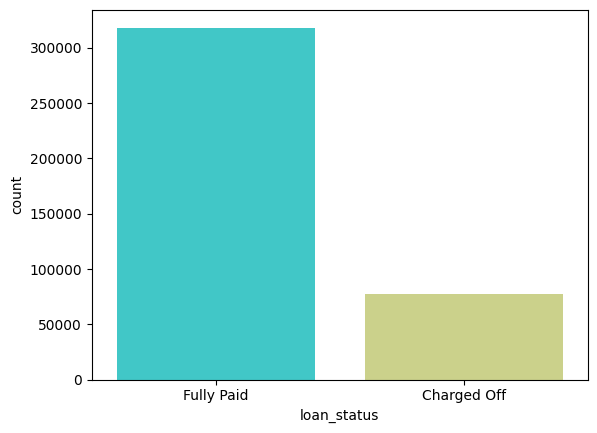

In [10]:
# Create a countplot to visualize the distribution of loan statuses ('Fully Paid' vs 'Charged Off').
# This helps to understand the class distribution of the target variable.
sns.countplot(x='loan_status', data=df, palette='rainbow')

<Axes: xlabel='loan_amnt'>

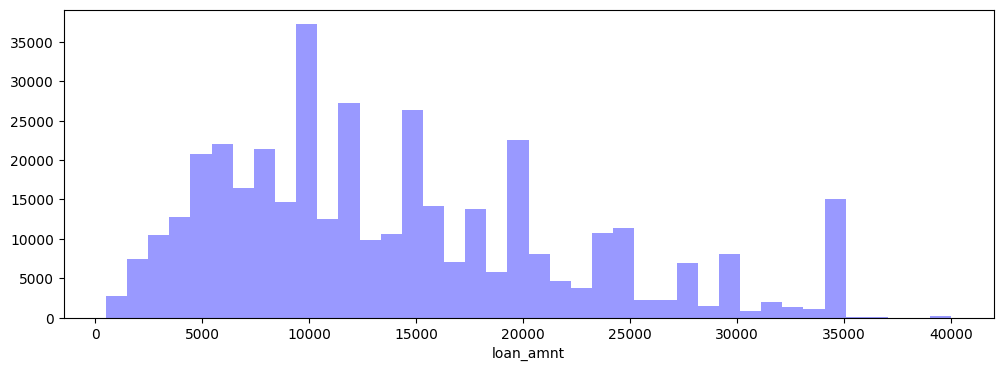

In [11]:
# Create a distribution plot to visualize the distribution of loan amounts.
# This shows the frequency of different loan amounts in the dataset.
plt.figure(figsize=(12, 4))
sns.distplot(df['loan_amnt'], bins=40, kde=False, color='blue')

In [12]:
# Select only numeric columns from the DataFrame to calculate correlations.
numeric_df = df.select_dtypes(include=np.number)

# Calculate and display the correlation matrix for all numeric columns.
# The correlation matrix shows the pairwise correlation coefficients between numerical features.
correlation_matrix = numeric_df.corr()
display(correlation_matrix)

# Calculate and display the correlation matrix for only the numeric columns.

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


(10.0, 0.0)

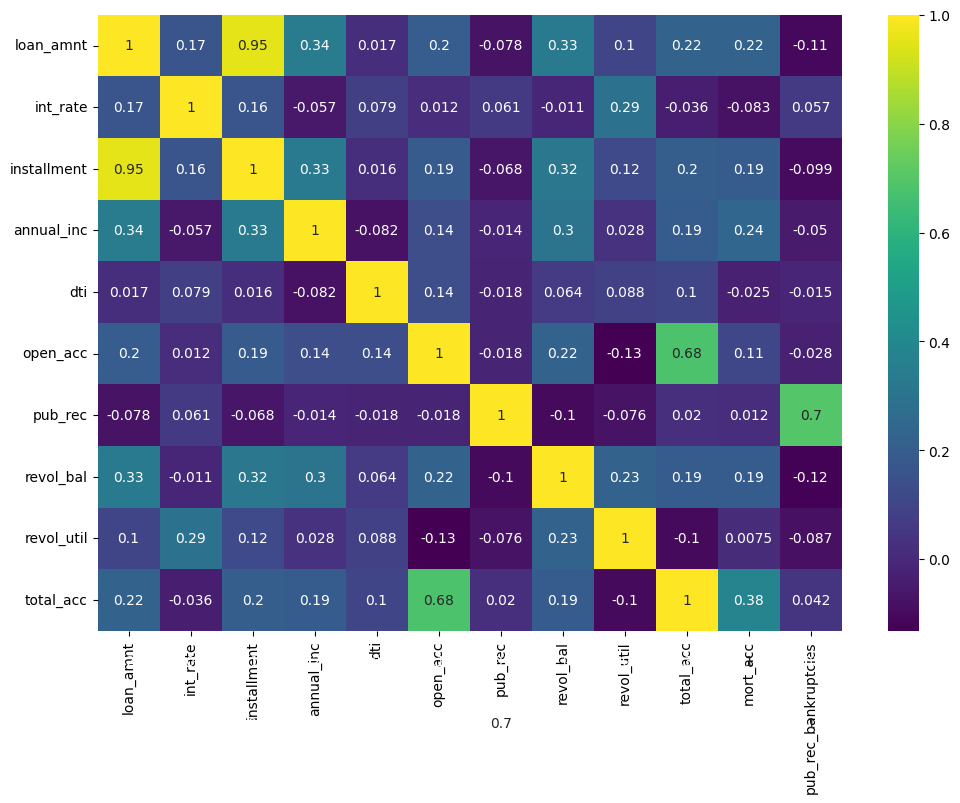

In [13]:
# Create a heatmap to visualize the correlation matrix.
# A heatmap is a graphical representation of the correlation matrix, making it easier to identify highly correlated features.
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='viridis', annot=True)
plt.ylim(10, 0)

In [14]:
# Get and print the description for the 'installment' column.
feat_info('installment')

The monthly payment owed by the borrower if the loan originates.


In [15]:
# Get and print the description for the 'loan_amnt' column.
feat_info('loan_amnt')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


<Axes: xlabel='installment', ylabel='loan_amnt'>

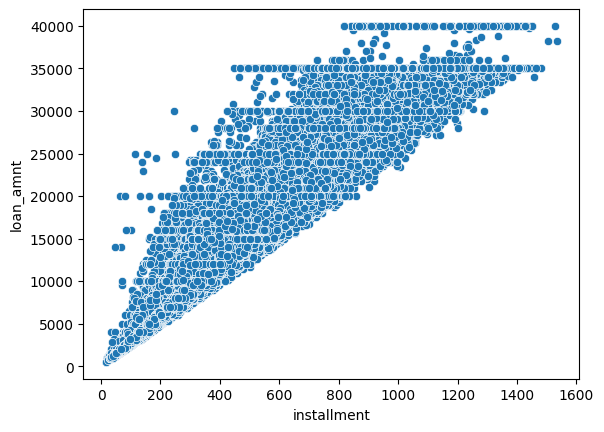

In [16]:
# Create a scatter plot to visualize the relationship between 'installment' and 'loan_amnt'.
# This helps to see if there is a linear relationship between the monthly payment and the loan amount.
sns.scatterplot(x='installment', y='loan_amnt', data=df)

<Axes: xlabel='loan_status', ylabel='loan_amnt'>

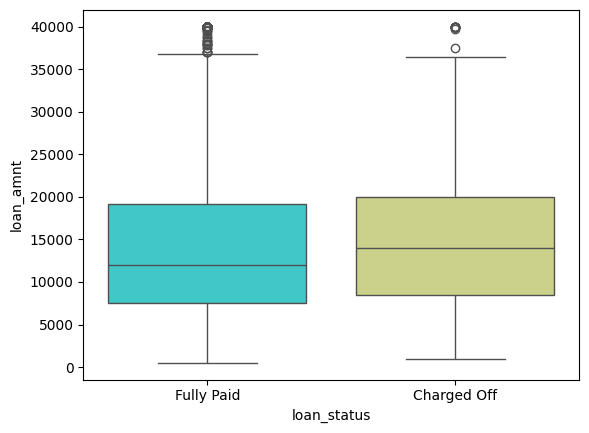

In [17]:
# Create a box plot to compare the distribution of 'loan_amnt' across different 'loan_status' categories.
# This helps to see if the loan amount is a good predictor of loan status.
sns.boxplot(x='loan_status', y='loan_amnt', data=df, palette='rainbow')

calculate summary statistics for loan amount group by loan status

In [18]:
# Calculate and display summary statistics for 'loan_amnt' grouped by 'loan_status'.
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [19]:
# Get and display the unique values in the 'grade' column.
# This shows the different loan grades present in the dataset.
df['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [20]:
# Get and display the unique values in the 'sub_grade' column.
# This shows the more granular loan subgrades.
df['sub_grade'].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

In [21]:
# Get and print the description for the 'sub_grade' column.
feat_info('sub_grade')

LC assigned loan subgrade


<Axes: xlabel='grade', ylabel='count'>

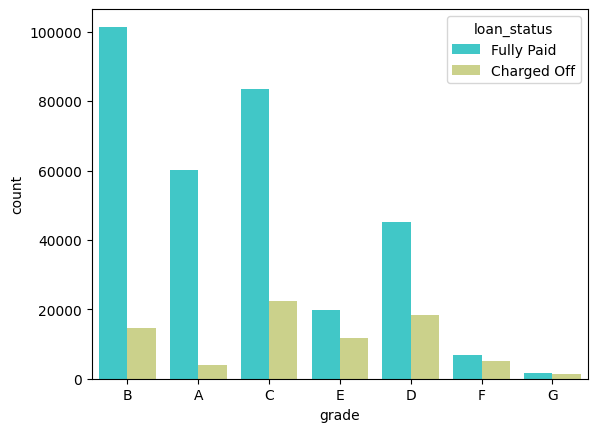

In [22]:
# Create a countplot to visualize the distribution of 'grade' with 'loan_status' as hue.
# This helps to see how loan status varies across different grades.
sns.countplot(x='grade', hue='loan_status', data=df, palette='rainbow')

<Axes: xlabel='sub_grade', ylabel='count'>

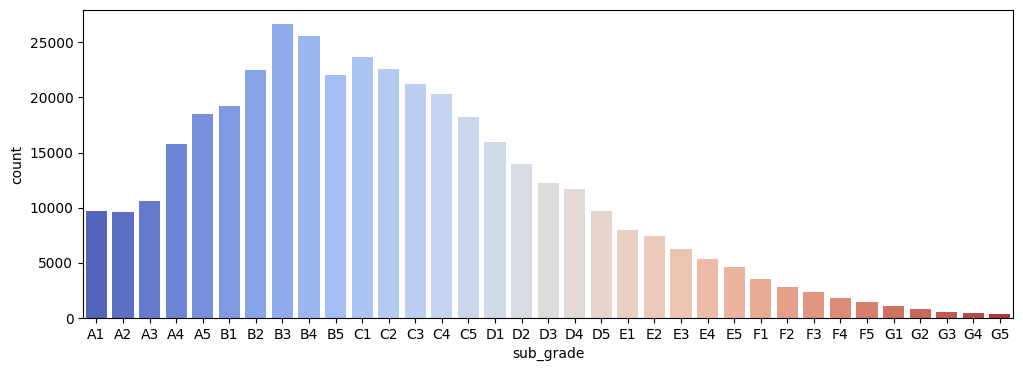

In [23]:
# Create a countplot to visualize the distribution of 'sub_grade' with ordered subgrades.
# Ordering the subgrades helps to see the distribution across the credit spectrum.
plt.figure(figsize=(12, 4))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df, order=subgrade_order, palette='coolwarm')

<Axes: xlabel='sub_grade', ylabel='count'>

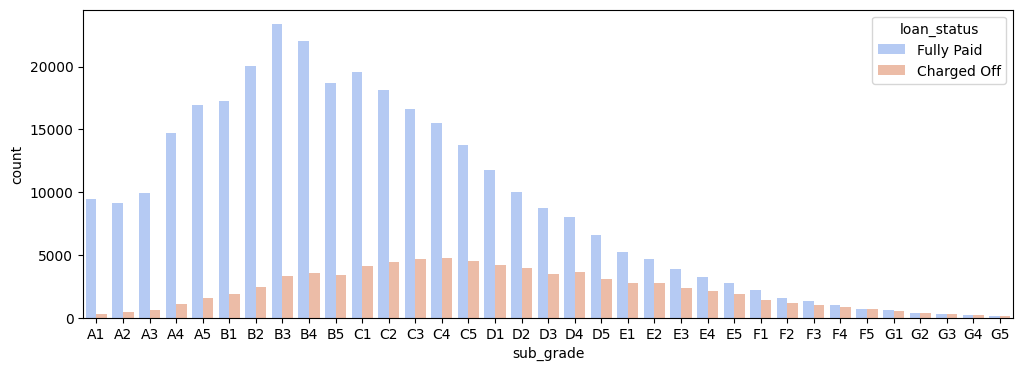

In [24]:
# Create a countplot to visualize the distribution of 'sub_grade' with ordered subgrades and 'loan_status' as hue.
# This provides a detailed view of loan status distribution within each subgrade, highlighting riskier subgrades.
plt.figure(figsize=(12, 4))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df, order=subgrade_order, palette='coolwarm', hue='loan_status')

We focused on grades F and G in the countplot to specifically look at the loan statuses for the lowest credit grades. The earlier countplot of all grades showed that as the grade gets worse (moves from A to G), there's a higher proportion of "Charged Off" loans compared to "Fully Paid" loans. By isolating F and G, we can examine this trend more closely for the riskiest loan categories.

<Axes: xlabel='sub_grade', ylabel='count'>

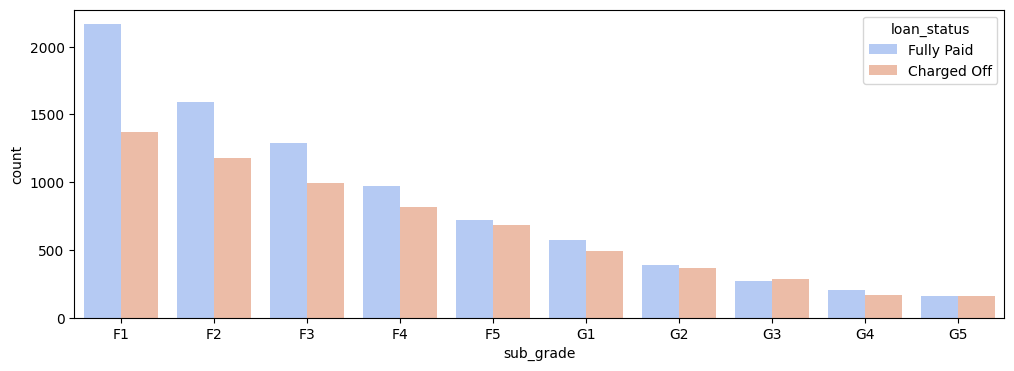

In [25]:
# Filter the DataFrame to include only grades 'F' and 'G', then create a countplot for subgrades within these grades.
# This focuses the analysis on the subgrades with the highest proportion of charged-off loans.
f_and_g = df[(df['grade']=='G') | (df['grade']=='F')]

plt.figure(figsize=(12, 4))
subgrade_order = sorted(f_and_g['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df, order=subgrade_order, palette='coolwarm', hue='loan_status')

new column loan repaid, which contains 1 if fully paid and 0 if it was "chared off"    

In [26]:
# Create a new column 'loan_repaid' mapping 'Fully Paid' to 1 and 'Charged Off' to 0.
df['loan_repaid'] = df['loan_status'].map({'Fully Paid': 1 , 'Charged Off': 0})

In [27]:
# Display the 'loan_repaid' and 'loan_status' columns to verify the mapping.
# This confirms that the new 'loan_repaid' column correctly reflects the binary loan status.
df[['loan_repaid', 'loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


,loan_repaid
int_rate,-0.247758
revol_util,-0.082373
dti,-0.062413
loan_amnt,-0.059836
installment,-0.041082
open_acc,-0.028012
pub_rec,-0.019933
pub_rec_bankruptcies,-0.009383
revol_bal,0.010892
total_acc,0.017893


<Axes: >

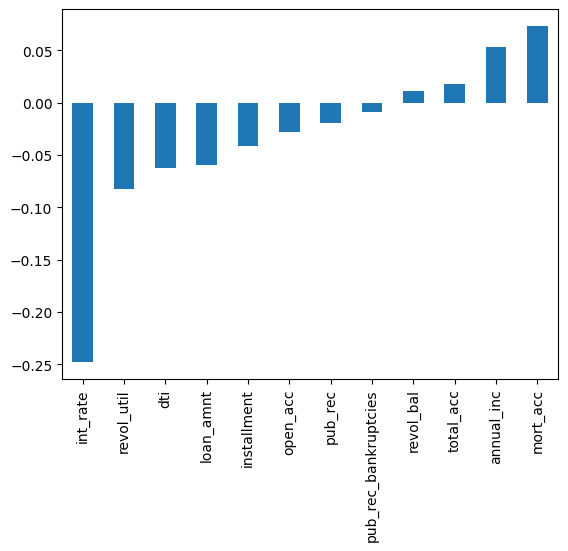

In [28]:
# Select only numeric columns including the new 'loan_repaid' column.
numeric_df = df.select_dtypes(include=np.number)

# Calculate and display the correlation of 'loan_repaid' with other numeric features.
# The 'loan_repaid' column is dropped from the result as it's the target variable itself.
# This helps identify which numerical features are most correlated with loan repayment status.
correlation_with_loan_repaid = numeric_df.corr()['loan_repaid'].sort_values().drop('loan_repaid')
display(correlation_with_loan_repaid)

<Axes: >

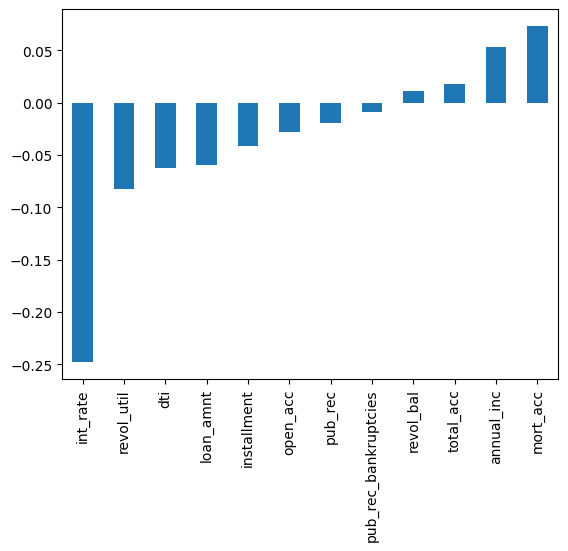

In [29]:
# Plot the correlation of features with 'loan_repaid' as a bar plot.
# This provides a visual representation of the correlation strength and direction.
correlation_with_loan_repaid.plot(kind='bar')

Data Preprocessing: Missing Data

In [30]:
# Display the first few rows of the DataFrame to inspect the data after initial loading.
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


Missing Data

In [31]:
# Get and display the number of rows in the DataFrame.
# This gives the total number of loan entries in the dataset.
len(df)

396030

In [32]:
# Create a Series that displays the total count of missing values per column.
# This is a crucial step in data preprocessing to identify columns with missing data.
df.isnull().sum()

,0
loan_amnt,0
term,0
int_rate,0
installment,0
grade,0
sub_grade,0
emp_title,22927
emp_length,18301
home_ownership,0
annual_inc,0


In [33]:
# Calculate and display the percentage of missing values per column.
# This gives a clearer picture of the extent of missing data in each column relative to the total number of entries.
100 * df.isnull().sum() / len(df)

,0
loan_amnt,0.000000
term,0.000000
int_rate,0.000000
installment,0.000000
grade,0.000000
sub_grade,0.000000
emp_title,5.789208
emp_length,4.621115
home_ownership,0.000000
annual_inc,0.000000


In [34]:
# Get and print the description for the 'emp_title' column.
feat_info('emp_title')

The job title supplied by the Borrower when applying for the loan.*


In [35]:
# Get and display the number of unique values in the 'emp_title' column.
# A high number of unique values indicates that this column might be difficult to use directly as a feature.
df['emp_title'].nunique()

173105

In [36]:
# Get and display the value counts for the 'emp_title' column.
# This shows the frequency of each job title.
df['emp_title'].value_counts()

,count
emp_title,
Teacher,4389
Manager,4250
Registered Nurse,1856
RN,1846
Supervisor,1830
...,...
OMIV Supervisor,1
"SVP, Technology",1
sikorsky,1


Realistically there are two many unique job titles to try to convert this to dummy variable feature, Let's remove the emp title column

In [37]:
# Drop the 'emp_title' column due to the extremely large number of unique values.
# Converting this column to dummy variables would result in a very sparse and high-dimensional feature space.
df = df.drop('emp_title', axis=1)

Create countplot of emp_length feature column, sort the order of the values




In [38]:
# Get and display the unique values in the 'emp_length' column after dropping missing values.
# This shows the different categories of employment length.
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [39]:
# Define the desired order for the 'emp_length' categories.
# This ordered list will be used for consistent plotting.
emp_length_order = ['< 1 year',
                    '1 year',
                    '2 years',
                    '3 years',
                    '4 years',
                    '5 years',
                    '6 years',
                    '7 years',
                    '8 years',
                    '9 years',
                    '10+ years']

<Axes: xlabel='emp_length', ylabel='count'>

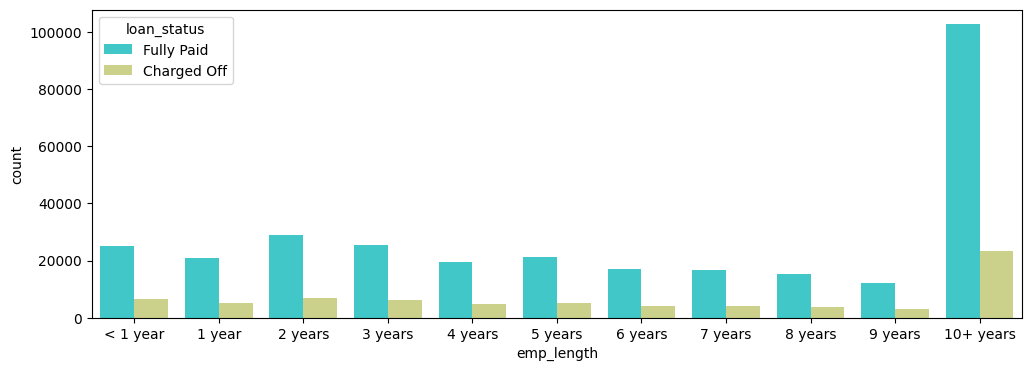

In [40]:
# Create a countplot to visualize the distribution of 'emp_length' with 'loan_status' as hue.
# This helps to see if there's a noticeable difference in loan repayment based on employment length.
plt.figure(figsize=(12, 4))
sns.countplot(x='emp_length', data=df, order=emp_length_order, palette='rainbow', hue='loan_status')

In [41]:
# Calculate the number of 'Charged Off' loans for each employment length.
# This is a step towards calculating the charge-off rate per employment length.
emp_co = df[df['loan_status'] == 'Charged Off'].groupby("emp_length").count()['loan_status']

In [42]:
# Calculate the number of 'Fully Paid' loans for each employment length.
# This is another step towards calculating the charge-off rate per employment length.
emp_fp = df[df['loan_status'] == 'Fully Paid'].groupby("emp_length").count()['loan_status']

In [43]:
# Calculate the charge-off rate for each employment length by dividing the number of charged-off loans by the total number of loans for each length.
emp_len = emp_co/(emp_co+emp_fp)

<Axes: xlabel='emp_length'>

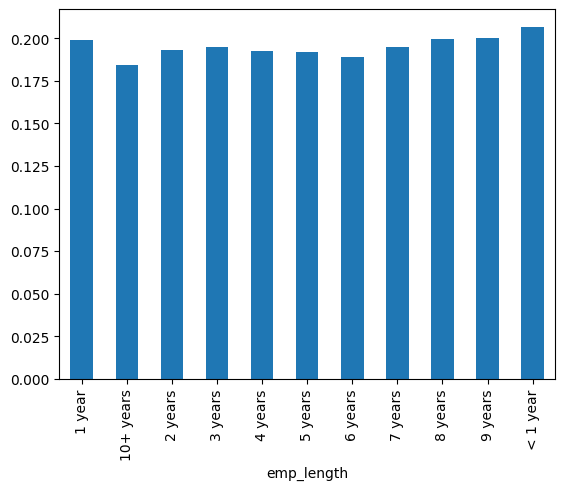

In [44]:
# Plot the charge-off rate by employment length as a bar plot.
# This visualizes whether employment length has a significant impact on the likelihood of a loan being charged off.
emp_len.plot(kind='bar')

charged off rate approximately similar accross all the  employment lengths go ahead and drop the emp_len column

In [45]:
# Drop the 'emp_length' column as the charge-off rate is similar across categories.
# Since employment length doesn't appear to be a strong predictor of loan status, we remove it to simplify the model.
df = df.drop('emp_length', axis=1)

In [46]:
# Check for remaining missing values after dropping 'emp_title' and 'emp_length'.
# This helps to identify other columns that still have missing data.
df.isnull().sum()

,0
loan_amnt,0
term,0
int_rate,0
installment,0
grade,0
sub_grade,0
home_ownership,0
annual_inc,0
verification_status,0
issue_d,0


task review the title column vs purpose column is this repeated information

In [47]:
# Get and print the description for the 'purpose' column.
# Understanding the purpose of the loan is important for the analysis.
feat_info('purpose')

A category provided by the borrower for the loan request. 


In [48]:
# Display the 'title' column to compare with the 'purpose' column.
# This is to check if the 'title' column provides redundant information compared to 'purpose'.
df['title']

,title
0,Vacation
1,Debt consolidation
2,Credit card refinancing
3,Credit card refinancing
4,Credit Card Refinance
...,...
396025,Debt consolidation
396026,Debt consolidation
396027,pay off credit cards
396028,Loanforpayoff


The title column is simple a string subcategory/description of the purpose column, so drop the column

In [49]:
# Drop the 'title' column as it's similar to 'purpose' and provides redundant information.
df = df.drop('title', axis=1)

Task : what mort_acc feature reprsents

In [50]:
# Display the first few values of the 'mort_acc' column to understand its format and content.
display(df['mort_acc'].head())

,mort_acc
0,0.0
1,3.0
2,0.0
3,0.0
4,1.0


In [51]:
# Check how the 'mort_acc' feature is correlated to other numerical features.
# This helps identify features that might be useful for imputing missing 'mort_acc' values.
display(numeric_df.corr()['mort_acc'].sort_values())

,mort_acc
int_rate,-0.082583
dti,-0.025439
revol_util,0.007514
pub_rec,0.011552
pub_rec_bankruptcies,0.027239
loan_repaid,0.073111
open_acc,0.109205
installment,0.193694
revol_bal,0.194925
loan_amnt,0.222315


- Look like total_acc correlates with mort_acc, this makes sence
- Let's try fillna() approch, we will group the dataframe with total_acc and
- calculate the mean value of mort_acc per total_acc entry, To get the result below:

In [52]:
# Check the data types of the columns in the DataFrame.
# This is important before performing operations that require specific data types.
display(df.dtypes)

,0
loan_amnt,float64
term,object
int_rate,float64
installment,float64
grade,object
sub_grade,object
home_ownership,object
annual_inc,float64
verification_status,object
issue_d,object


In [53]:
# Drop the 'loan_status' column as we have created the 'loan_repaid' column, which is the binary target variable.
df = df.drop('loan_status', axis=1)

In [54]:
# Identify non-numeric columns before calculating the mean of 'mort_acc' grouped by 'total_acc'.
object_columns = df.select_dtypes(include='object').columns

# Drop the identified object columns to work only with numerical data for the grouping and mean calculation.
df_numeric_only = df.drop(object_columns, axis=1)

# Now perform the groupby and mean calculation on the DataFrame with only numeric columns.
# This calculates the average number of mortgage accounts for each level of total credit accounts.
total_acc_avg = df_numeric_only.groupby('total_acc').mean()['mort_acc']
display(total_acc_avg)

,mort_acc
total_acc,
2.0,0.000000
3.0,0.052023
4.0,0.066743
5.0,0.103289
6.0,0.151293
...,...
124.0,1.000000
129.0,1.000000
135.0,3.000000


In [55]:
# Define a function to fill missing 'mort_acc' values based on the average 'mort_acc' for the corresponding 'total_acc'.
# This function will be applied to each row to impute missing mortgage account values.
def fill_mort_acc(total_acc, mort_acc):
  if np.isnan(mort_acc):
    return total_acc_avg[total_acc]
  else:
    return mort_acc

In [56]:
# Apply the fill_mort_acc function to fill missing 'mort_acc' values.
# The function is applied row-wise (axis=1) to use the 'total_acc' value from each row for imputation.
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

In [57]:
# Check for remaining missing values after filling 'mort_acc'.
# This verifies that the imputation process for 'mort_acc' was successful.
df.isnull().sum()

,0
loan_amnt,0
term,0
int_rate,0
installment,0
grade,0
sub_grade,0
home_ownership,0
annual_inc,0
verification_status,0
issue_d,0


In [58]:
# Drop rows with any remaining missing values.
# After imputing 'mort_acc', we drop rows that still have missing values in other columns ('revol_util' and 'pub_rec_bankruptcies').
df = df.dropna()

In [59]:
# Verify that there are no more missing values in the DataFrame.
# This confirms that the data is now clean and ready for feature engineering and modeling.
df.isnull().sum()

,0
loan_amnt,0
term,0
int_rate,0
installment,0
grade,0
sub_grade,0
home_ownership,0
annual_inc,0
verification_status,0
issue_d,0


Categorical & Dummy Variables

In [60]:
# Identify and display the names of the object type columns.
# These are the categorical columns that need to be converted into a numerical format for the model.
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

create term feature into either 36 or 60 numeric integer datatype. using .apply() or .map() function

In [61]:
# Get and print the description for the 'term' column.
feat_info('term')

The number of payments on the loan. Values are in months and can be either 36 or 60.


In [62]:
# Get and display the value counts for the 'term' column.
# This shows the distribution of loan terms (36 or 60 months).
df['term'].value_counts()

,count
term,
36 months,301247
60 months,93972


In [63]:
# Convert the 'term' column to numeric by extracting the number of months from the string.
# This transforms the categorical 'term' into a numerical feature.
df['term'] = df['term'].apply(lambda term : int(term[:3]))

In [64]:
# Display the value counts for the converted 'term' column to verify the conversion.
df['term'].value_counts()

,count
term,
36,301247
60,93972


grade feature : we already know grade is part of sub_grade, so just drop it

In [65]:
# Drop the 'grade' column as 'sub_grade' provides more granular information and is sufficient for capturing credit risk.
df = df.drop('grade', axis=1)

- Task: Convert sub_grade column into dummy variables. Then concatname these new columns into original Dataframe.
- Remember to drop original subgrade column and to add drop_first=True to your get_dummies call

In [66]:
# Convert the 'sub_grade' column into dummy variables using one-hot encoding.
# 'drop_first=True' is used to avoid multicollinearity.
dummies = pd.get_dummies(df['sub_grade'], drop_first=True)

# Concatenate the new dummy variables with the original DataFrame and drop the original 'sub_grade' column.
df = pd.concat([df.drop('sub_grade',axis=1),dummies],axis=1)

In [67]:
# Display the updated column names after adding the sub_grade dummy variables.
# This shows the new columns created from the one-hot encoding.
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'purpose', 'dti',
       'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2', 'A3', 'A4',
       'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1',
       'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3',
       'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5'],
      dtype='object')

- Verification_status, application_type, initial_list_status, purpose
- Convert these columns into dummy variables and concatnate them into original dataframe
- Remember to set drop_first=True and to drop the original columns

In [68]:
# Convert multiple categorical columns ('verification_status', 'application_type', 'initial_list_status', 'purpose') into dummy variables.
# 'drop_first=True' is used for each to avoid multicollinearity.
dummies = pd.get_dummies(df[['verification_status', 'application_type', 'initial_list_status', 'purpose']], drop_first=True)

# Concatenate the new dummy variables with the DataFrame and drop the original categorical columns.
df = pd.concat([df.drop(['verification_status', 'application_type', 'initial_list_status', 'purpose'],axis=1),dummies],axis=1)

- Home ownership : Review the value counts of the home_ownership columns  

In [69]:
# Display the value counts of the 'home_ownership' column to identify the different categories.
df['home_ownership'].value_counts()

,count
home_ownership,
MORTGAGE,198022
RENT,159395
OWN,37660
OTHER,110
NONE,29
ANY,3


- Task:
- Convert these dummy variables, but replace NONE and ANY with OTHER  
- so we end up with just 4 categories, MORTGAGE, RENT, OWN, OTHER
- Then concatnate them with orignal dataframe
- Remember to drop_first=True and to drop original columns

In [70]:
# Replace 'NONE' and 'ANY' categories in 'home_ownership' with 'OTHER' to group less frequent categories.
df['home_ownership'] = df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

In [71]:
# Convert the modified 'home_ownership' column into dummy variables.
# 'drop_first=True' is used to avoid multicollinearity.
dummies = pd.get_dummies(df['home_ownership'], drop_first=True)

# Concatenate the new dummy variables with the DataFrame and drop the original 'home_ownership' column.
df = pd.concat([df.drop('home_ownership',axis=1),dummies],axis=1)

- Address:
- Let's feature engineer a zip code column from the address in the dataset
- create column name called zip_code that extract zip_code from the address column

In [72]:
# Extract the zip code (last 5 characters) from the 'address' column and create a new 'zip_code' column.
# This feature engineering step extracts potentially useful geographical information.
df['zip_code'] = df['address'].apply(lambda address:address[-5:])

In [73]:
# Display the value counts for the newly created 'zip_code' column.
# This shows the distribution of loans across different zip codes.
df['zip_code'].value_counts()

,count
zip_code,
70466,56880
22690,56413
30723,56402
48052,55811
00813,45725
29597,45393
05113,45300
11650,11210
93700,11126


In [74]:
# Convert the 'zip_code' column into dummy variables.
# 'drop_first=True' is used to avoid multicollinearity.
dummies = pd.get_dummies(df['zip_code'], drop_first=True)

# Concatenate the new dummy variables with the DataFrame and drop the original 'zip_code' column.
df = pd.concat([df.drop('zip_code',axis=1),dummies],axis=1)

In [75]:
# Drop the original 'address' column as zip code has been extracted and the full address is not needed for the model.
df = df.drop('address',axis=1)

- issue_d
- This would be data leakege, we wouldn't know beforehand wheather or not a loan would be issued when using our model
- In theory we wouldn't have issue date, drop this feature

In [76]:
# Get and print the description for the 'issue_d' column.
feat_info('issue_d')

The month which the loan was funded


In [77]:
# Drop the 'issue_d' column as it represents data leakage.
# The loan issue date would not be known at the time of predicting whether a loan will be repaid.
df = df.drop('issue_d', axis=1)

- earliest_cr_line
- This appears to be an historical time stamp feature
- Extract the year from the feature using .apply function then convert it into the numeric feature
- set this new data to feature called earliest_cr_line, then drop earliest_cr_line

In [78]:
# Get and print the description for the 'earliest_cr_line' column.
feat_info('earliest_cr_line')

The month the borrower's earliest reported credit line was opened


In [79]:
# Extract the year from the 'earliest_cr_line' and convert it to a numeric feature.
# This represents the year the borrower's earliest credit line was opened, which can be a factor in creditworthiness.
df['earliest_cr_line'] = df['earliest_cr_line'].apply(lambda date:int(date[-4:]))

In [80]:
# Display the value counts for the converted 'earliest_cr_line' column to verify the conversion.
df['earliest_cr_line'].value_counts()

,count
earliest_cr_line,
2000,29302
2001,29031
1999,26444
2002,25849
2003,23623
...,...
1950,3
1951,3
1953,2


Train Test Split

In [81]:
# Import the train_test_split function from scikit-learn for splitting the data.
from sklearn.model_selection import train_test_split

In [82]:
# df = df.drop('loan_status', axis=1)
# which is already droppped

In [83]:
# Define the features (X) by dropping the target variable 'loan_repaid' from the DataFrame and converting to a NumPy array.
X = df.drop('loan_repaid', axis=1).values

In [84]:
# Define the target variable (y) as the 'loan_repaid' column and convert to a NumPy array.
y = df['loan_repaid'].values

In [85]:
# Display the number of rows in the DataFrame after preprocessing.
# This shows the total number of samples available for training and testing.
print(len(df))

395219


In [86]:
# Split the data into training and testing sets using train_test_split.
# 80% of the data is used for training and 20% for testing.
# random_state is set for reproducibility.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [87]:
# Import the MinMaxScaler from scikit-learn for feature scaling.
# Scaling is important for neural networks as it helps the optimization process converge faster.
from sklearn.preprocessing import MinMaxScaler

In [88]:
# Initialize the MinMaxScaler.
scaler = MinMaxScaler()

In [89]:
# Fit the scaler on the training data and transform the training data.
# The scaler learns the min and max values from the training data.
X_train = scaler.fit_transform(X_train)

In [90]:
# Transform the testing data using the fitted scaler.
# It's crucial to use the *same* scaler fitted on the training data to transform the test data to avoid data leakage.
X_test = scaler.transform(X_test)

Create the model

In [91]:
# Import necessary libraries from TensorFlow and Keras for building the neural network model.
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

Good Thumb Rule: your first layer should match up with same number of features for normal ANN

In [92]:
# Display the shape of the training data (number of samples, number of features).
X_train.shape

(316175, 78)

In [93]:
# Define the Sequential model architecture.
model = Sequential()

# Add Dense layers with ReLU activation and Dropout layers for regularization.
# The first layer has 78 neurons, matching the number of features in the input data.
model.add(Dense(78, activation='relu')) # Input layer with 78 neurons (matching the number of features)
model.add(Dropout(0.2)) # Dropout layer to prevent overfitting by randomly setting a fraction of input units to 0 at each update during training.

model.add(Dense(39, activation='relu')) # Hidden layer with 39 neurons.
model.add(Dropout(0.2)) # Another Dropout layer.

model.add(Dense(19, activation='relu')) # Hidden layer with 19 neurons.
model.add(Dropout(0.2)) # Another Dropout layer.

# Output layer with a single neuron and sigmoid activation for binary classification.
# The sigmoid activation function outputs a probability between 0 and 1.
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model with binary crossentropy loss and Adam optimizer.
# Binary crossentropy is a common loss function for binary classification. Adam is an efficient optimization algorithm.
model.compile(loss='binary_crossentropy', optimizer='adam')

Fit the model

In [95]:
# Train the model using the training data and validate on the testing data.
# Train for 25 epochs with a batch size of 256.
# The validation data is used to monitor the model's performance on unseen data during training.
model.fit(x=X_train, y=y_train, epochs=25, batch_size=256, validation_data=(X_test, y_test), verbose=1)

Epoch 1/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.3691 - val_loss: 0.2648
Epoch 2/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 0.2677 - val_loss: 0.2630
Epoch 3/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.2627 - val_loss: 0.2623
Epoch 4/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 0.2625 - val_loss: 0.2621
Epoch 5/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 0.2615 - val_loss: 0.2616
Epoch 6/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.2604 - val_loss: 0.2615
Epoch 7/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.2603 - val_loss: 0.2619
Epoch 8/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.2599 - val_loss: 0.2616
Epoch 9/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 0.2571 - val_loss: 0.2616
Epoch 10/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - loss: 0.2584 - val_loss: 0.2617
Epoch 11/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - loss: 0.2592 - val_loss: 0.2612
Epoch 12/25
1236/1236 ━━

Saving model:


The .h5 format, also known as HDF5 (Hierarchical Data Format), is a file format used to store large amounts of numerical data, and is commonly used to save Keras models. It's a good choice for saving models because it can store the model's architecture, weights, and training configuration in a single file. The warning you saw in the output indicates that Keras now recommends using their native .keras format, but .h5 is still widely supported and used.

In [96]:
# Import load_model function to load a saved model.
from tensorflow.keras.models import load_model

# Save the trained model in HDF5 format.
# This allows you to reuse the trained model without retraining.
model.save('myfavoritemodel.h5')

Eavaluate Model Performance

In [97]:
# Create a pandas DataFrame from the model's training history.
# This history contains the loss values for both training and validation sets across epochs.
losses = pd.DataFrame(model.history.history)

<Axes: >

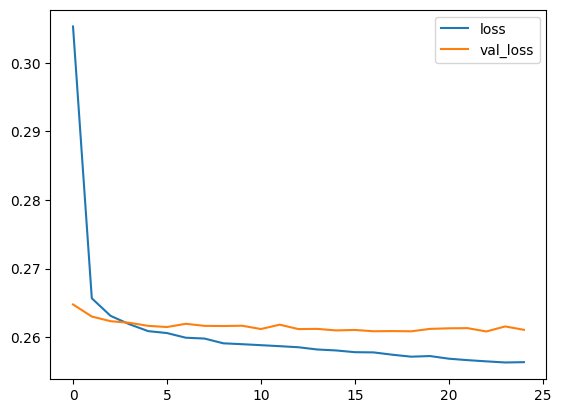

In [98]:
# Plot the training and validation loss over epochs.
# This plot helps to visualize the training progress and detect overfitting (if validation loss starts increasing).
losses.plot()

create predictions from the X_test set and display classification_report and confusion_matrix for X_test set

In [99]:
# Import metrics for evaluating the model: classification_report and confusion_matrix.
# These metrics are used to assess the performance of the binary classification model.
from sklearn.metrics import classification_report, confusion_matrix

In [102]:
# Generate predictions on the test set. The output is probabilities from the sigmoid layer.
# These probabilities are then converted to binary predictions (0 or 1) based on a threshold of 0.5.
predictions = (model.predict(X_test) > 0.5).astype("int32")

2471/2471 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


In [103]:
# Print the classification report to evaluate the model's performance (precision, recall, f1-score).
# This report provides a comprehensive evaluation of the model's performance for each class.
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.44      0.60     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.93      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



In [104]:
# Print the confusion matrix to visualize the model's predictions versus the actual values.
# The confusion matrix shows the number of true positives, true negatives, false positives, and false negatives.
print(confusion_matrix(y_test, predictions))

[[ 6817  8841]
 [   77 63309]]


In [105]:
# Display the value counts of the target variable 'loan_repaid' to check the class distribution in the original dataset.
# This helps to understand if the dataset is imbalanced.
df['loan_repaid'].value_counts()

,count
loan_repaid,
1,317696
0,77523


In [106]:
# Calculate the proportion of the majority class (Fully Paid) in the dataset.
# This provides a baseline accuracy that a simple model predicting the majority class would achieve.
317696/len(df)

0.8038479931379817

In [107]:
# Select a random customer from the original DataFrame to make a prediction.
import random
random.seed(101) # Set a seed for reproducibility
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

,305323
loan_amnt,25000.0
term,60
int_rate,18.24
installment,638.11
annual_inc,61665.0
...,...
30723,True
48052,False
70466,False
86630,False


In [110]:
# Reshape the new customer data to have a shape of (1, number_of_features) as expected by the scaler and model.
# Then, scale the new customer data using the same scaler fitted on the training data.
new_customer=scaler.transform(new_customer.values.reshape(1, 78))

In [116]:
# Make a prediction for the new customer using the trained model.
# The output is a probability, which is then converted to a binary prediction (0 or 1).
prediction = (model.predict(new_customer) > 0.5).astype("int32")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


In [117]:
# Display the actual loan repayment status for the randomly selected customer from the original DataFrame.
# This is to compare the model's prediction with the actual outcome for this customer.
df.iloc[random_ind]['loan_repaid']

np.int64(1)